# Disneyland Reviews
## About this dataset
The dataset includes 42,000 reviews of 3 Disneyland branches - Paris, California and Hong Kong, posted by visitors on Trip Advisor.
1- Review_ID: unique id given to each reviewPark

2- Rating: ranging from 1 (unsatisfied) to 5 (satisfied)

3- Year_Month: when the reviewer visited the theme park

4- Reviewer_Location: country of origin of visit

5- Review_Text: comments made by visitor

6- Disneyland_Branch: location of Disneyland Park

### Step 1: Import the Required Library

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Datasets

In [301]:
df = pd.read_csv('DisneylandReviews.csv', encoding='latin1')
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


### Step 3: Data Wrangling
 1- Count missing values:

  convert the string 'missing' to a standard missing value representation (NaN) so that it can be counted

In [302]:
df.replace('missing', np.nan, inplace=True)
print(df.isnull().sum())

Review_ID               0
Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64


In [303]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


2- Drop the Null values

In [304]:
df = df.dropna()
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42113,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
42114,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
42115,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
42116,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


In [305]:
#after cleaning
print(df.isnull().sum())

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


In [306]:
df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

3- convert the Year_Month from object to datetime format.

In [307]:
df['Year_Month'] = pd.to_datetime(df['Year_Month'])
df

C:\Users\rofid\AppData\Local\Temp\ipykernel_9536\2353631232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Month'] = pd.to_datetime(df['Year_Month'])


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42113,92198076,4,2011-01-01,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
42114,92061774,4,2011-01-01,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
42115,91995748,1,2010-12-01,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
42116,91984642,2,2010-12-01,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


### Step5: Data Analysis
 1-  Calculate summary statistics for numerical columns.

In [308]:
df.describe()

,Review_ID,Rating,Year_Month
count,4.004300e+04,40043.000000,40043
mean,3.321356e+08,4.231102,2015-05-17 01:34:15.280573184
min,9.161911e+07,1.000000,2010-03-01 00:00:00
25%,1.862596e+08,4.000000,2013-09-01 00:00:00
50%,3.075274e+08,5.000000,2015-07-01 00:00:00
75%,4.605042e+08,5.000000,2016-12-01 00:00:00
max,6.708014e+08,5.000000,2019-05-01 00:00:00
std,1.605565e+08,1.051938,NaN


2- Structure of a DataFrame

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40043 entries, 0 to 42117
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_ID          40043 non-null  int64         
 1   Rating             40043 non-null  int64         
 2   Year_Month         40043 non-null  datetime64[ns]
 3   Reviewer_Location  40043 non-null  object        
 4   Review_Text        40043 non-null  object        
 5   Branch             40043 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.1+ MB


3- Calculates the frequency of each unique value in the 'Rating' column.

In [310]:
ratings_distribution = df['Rating'].value_counts()
print(ratings_distribution)

Rating
5    21908
4    10086
3     4782
2     1929
1     1338
Name: count, dtype: int64


4- Calculate the average in the 'Rating' column.

In [311]:
average_rating = df['Rating'].mean()
print(average_rating)

4.231101565816747


### Step6:  Data Visualization
1- Using bar plot to visualize the distribution of rating.

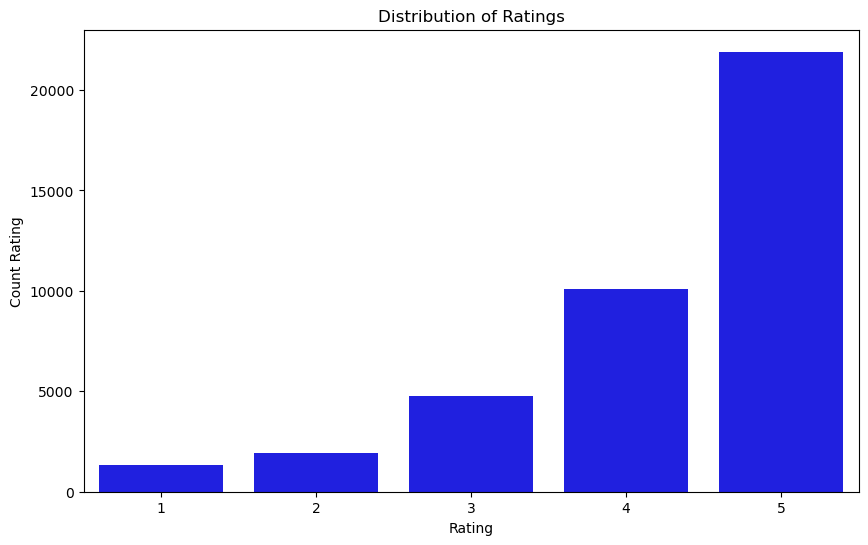

In [312]:
rating_counts = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='b')
plt.xlabel('Rating')
plt.ylabel('Count Rating')
plt.title('Distribution of Ratings')
plt.show()

 2- Using bar plot to identify which branches are performing better or worse compared to others.

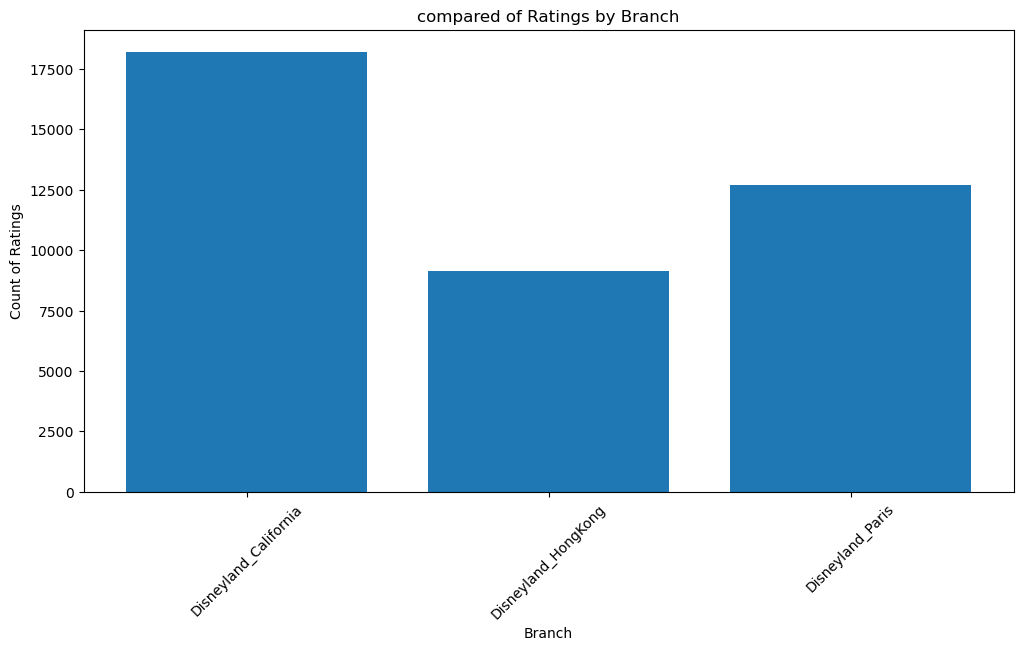

In [313]:
rating_counts = df.groupby('Branch')['Rating'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(rating_counts['Branch'], rating_counts['Rating'])
plt.xlabel('Branch')
plt.ylabel('Count of Ratings')
plt.title('compared of Ratings by Branch')
plt.xticks(rotation=45)
plt.show()

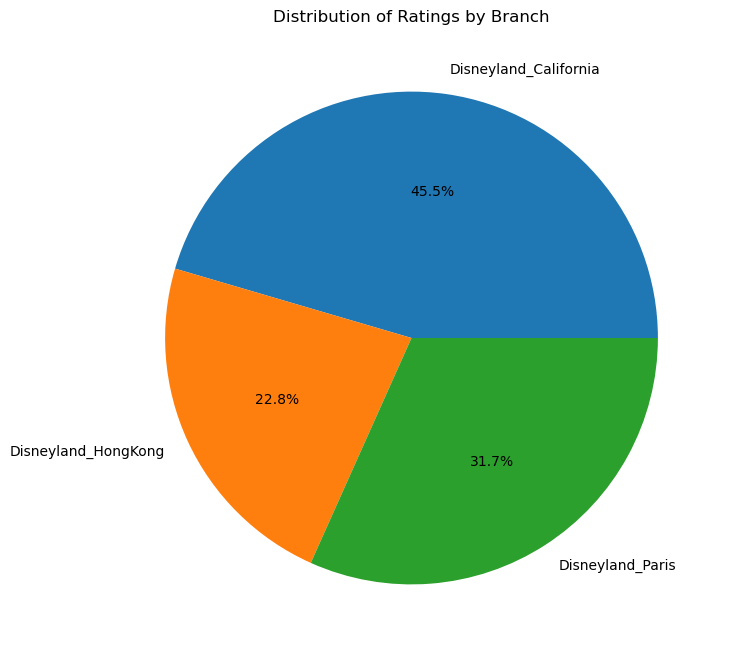

In [314]:
rating_counts = df.groupby('Branch')['Rating'].count().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts['Rating'], labels=rating_counts['Branch'], autopct='%1.1f%%')
plt.title('Distribution of Ratings by Branch')
plt.show()

3- Using line plot to calculate average rating per year

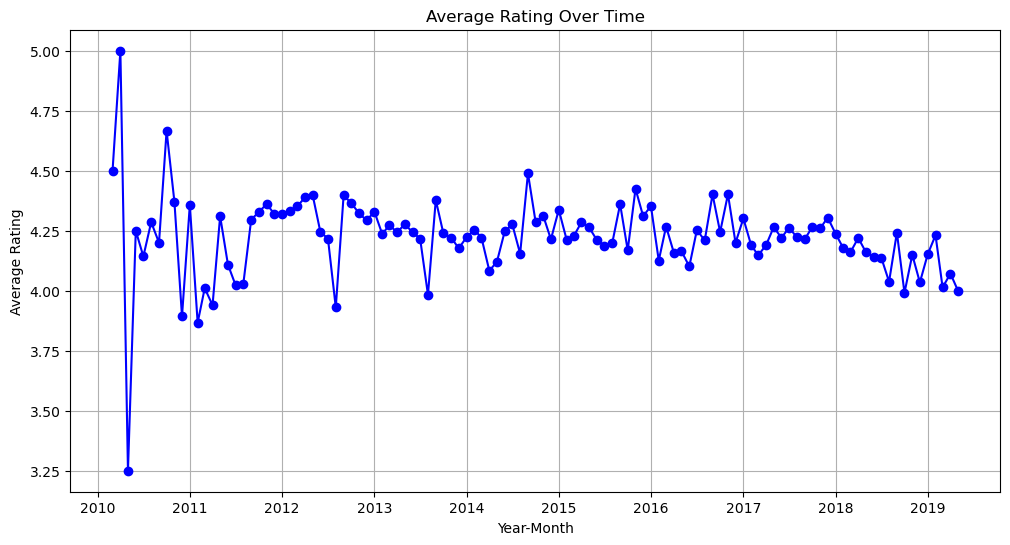

In [299]:
# Calculate average rating per month
average_rating_per_year = df.groupby('Year_Month')['Rating'].mean()

# Plot average rating per month
plt.figure(figsize=(12, 6))
plt.plot(average_rating_per_year, color='b',marker='o', label='Average Rating')
plt.title('Average Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()